## Importações

In [1]:
# EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import sweetviz as sv
# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score
# Otimização de Hiperparâmetros
import optuna


In [2]:
# Carregar Dataset

df_obesidade = pd.read_csv("./dataset_obesidade.csv")

In [3]:
df_obesidade.head(10)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0
5,1,29.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,1,0,0,0,0,0
6,0,23.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,0,0,1,0,0,0
7,1,22.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,0,0,0,1,0,0
8,1,24.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,0,0,0,1,0,0
9,1,22.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,0,0,0,1,0,0


In [4]:
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

In [5]:
# Converter variáveis para tipo inteiro

lista_colunas = ['Idade','Consumo_Vegetais_Com_Frequencia','Refeicoes_Dia',
                 'Consumo_Agua','Nivel_Atividade_Fisica','Nivel_Uso_Tela']

df_obesidade[lista_colunas] = df_obesidade[lista_colunas].astype('int64')

In [6]:
df_obesidade.isna().sum()

Genero_Masculino                       0
Idade                                  0
Historico_Familiar_Sobrepeso           0
Consumo_Alta_Caloria_Com_Frequencia    0
Consumo_Vegetais_Com_Frequencia        0
Refeicoes_Dia                          0
Consumo_Alimentos_entre_Refeicoes      0
Fumante                                0
Consumo_Agua                           0
Monitora_Calorias_Ingeridas            0
Nivel_Atividade_Fisica                 0
Nivel_Uso_Tela                         0
Consumo_Alcool                         0
Transporte_Automovel                   0
Transporte_Bicicleta                   0
Transporte_Motocicleta                 0
Transporte_Publico                     0
Transporte_Caminhada                   0
Obeso                                  0
dtype: int64

## EDA

In [7]:
# Distribuição da variável target 
px.bar(df_obesidade.value_counts('Obeso'))

In [8]:
px.bar(df_obesidade.value_counts('Obeso')/len(df_obesidade)* 100) 

In [9]:
# Analise Univariada
px.histogram(df_obesidade, x='Idade')

In [10]:
# Análise univariada Idade
px.box(df_obesidade,y='Idade')

In [11]:
# Analise Univariada - Genero
px.bar(df_obesidade.value_counts('Genero_Masculino')/len(df_obesidade) * 100)

In [12]:
# Analise Univariada - Historico de Obesidade na familia
px.bar(df_obesidade.value_counts('Historico_Familiar_Sobrepeso')/len(df_obesidade) * 100)

In [13]:
# Análise Univariada - Nível de Exercício
px.bar(df_obesidade.value_counts('Nivel_Atividade_Fisica')/len(df_obesidade) * 100)

In [14]:
# Análise Univariada - Nível de Uso de Tela
px.bar(df_obesidade.value_counts('Nivel_Uso_Tela')/len(df_obesidade) * 100)

In [15]:
# Formulação de Hipótese
# Faixa Etária influencia em obesidade
df_obesidade['Idade'].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Idade, dtype: float64

In [16]:
# Bucketing de Idade
bins = [10,20,30,40,50,60,70]
bins_ordinal = [0,1,2,3,4,5]
labels_faixa_etaria = ['10-20','20-30','30-40','40-50', '50-60', '60-70']
df_obesidade['Faixa_Etaria_String'] = pd.cut(x=df_obesidade['Idade'],bins=bins,labels=labels_faixa_etaria, include_lowest=True)
df_obesidade['Faixa_Etaria'] = pd.cut(x=df_obesidade['Idade'],bins=bins,labels=bins_ordinal, include_lowest=True)
df_obesidade.head()

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso,Faixa_Etaria_String,Faixa_Etaria
0,0,21,1,0,2,3,1,0,2,0,...,1,0,0,0,0,1,0,0,20-30,1
1,0,21,1,0,3,3,1,1,3,1,...,0,1,0,0,0,1,0,0,20-30,1
2,1,23,1,0,2,3,1,0,2,0,...,1,2,0,0,0,1,0,0,20-30,1
3,1,27,0,0,3,3,1,0,2,0,...,0,2,0,0,0,0,1,0,20-30,1
4,1,22,0,0,2,1,1,0,2,0,...,0,1,0,0,0,1,0,0,20-30,1


In [17]:
# Criar uma Tabela de Contigência - Faixa Etária e Obesidade
tabela_contingencia_faixa_etaria = sm.stats.Table.from_data(df_obesidade[['Obeso','Faixa_Etaria_String']])

In [18]:
tabela_contingencia_faixa_etaria.table_orig

Faixa_Etaria_String,10-20,20-30,30-40,40-50,50-60,60-70
Obeso,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [19]:
# Teste de Chi-Square de Pearson
# H0 as variáveis são independentes
# h1 as variáveis naão são independentes
print(tabela_contingencia_faixa_etaria.test_nominal_association())

df          5
pvalue      0.0
statistic   170.1116865347508


In [20]:
# p_value < 0.05, rejeitamos H0, portanto as variáveis não são independentes

In [21]:
# Automatizar EDA
sv_obesidade_report = sv.analyze(df_obesidade,target_feat='Obeso')

                                             |          | [  0%]   00:00 -> (? left)


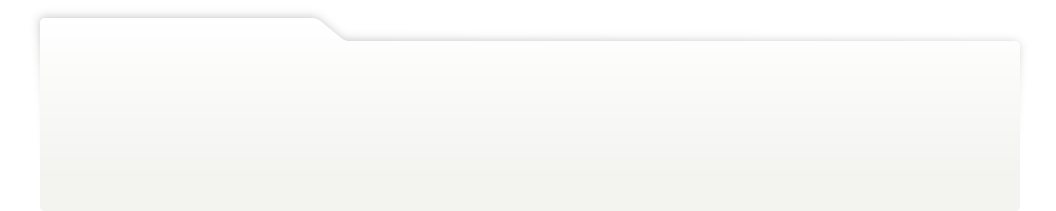
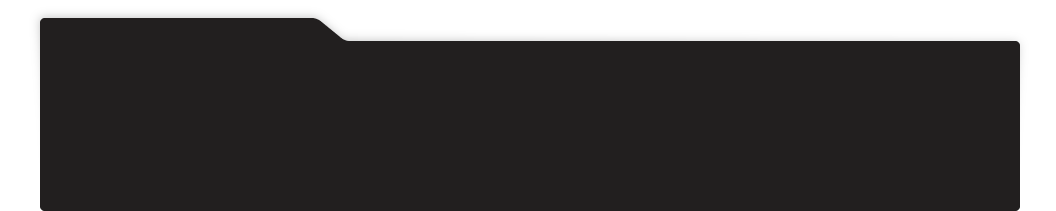
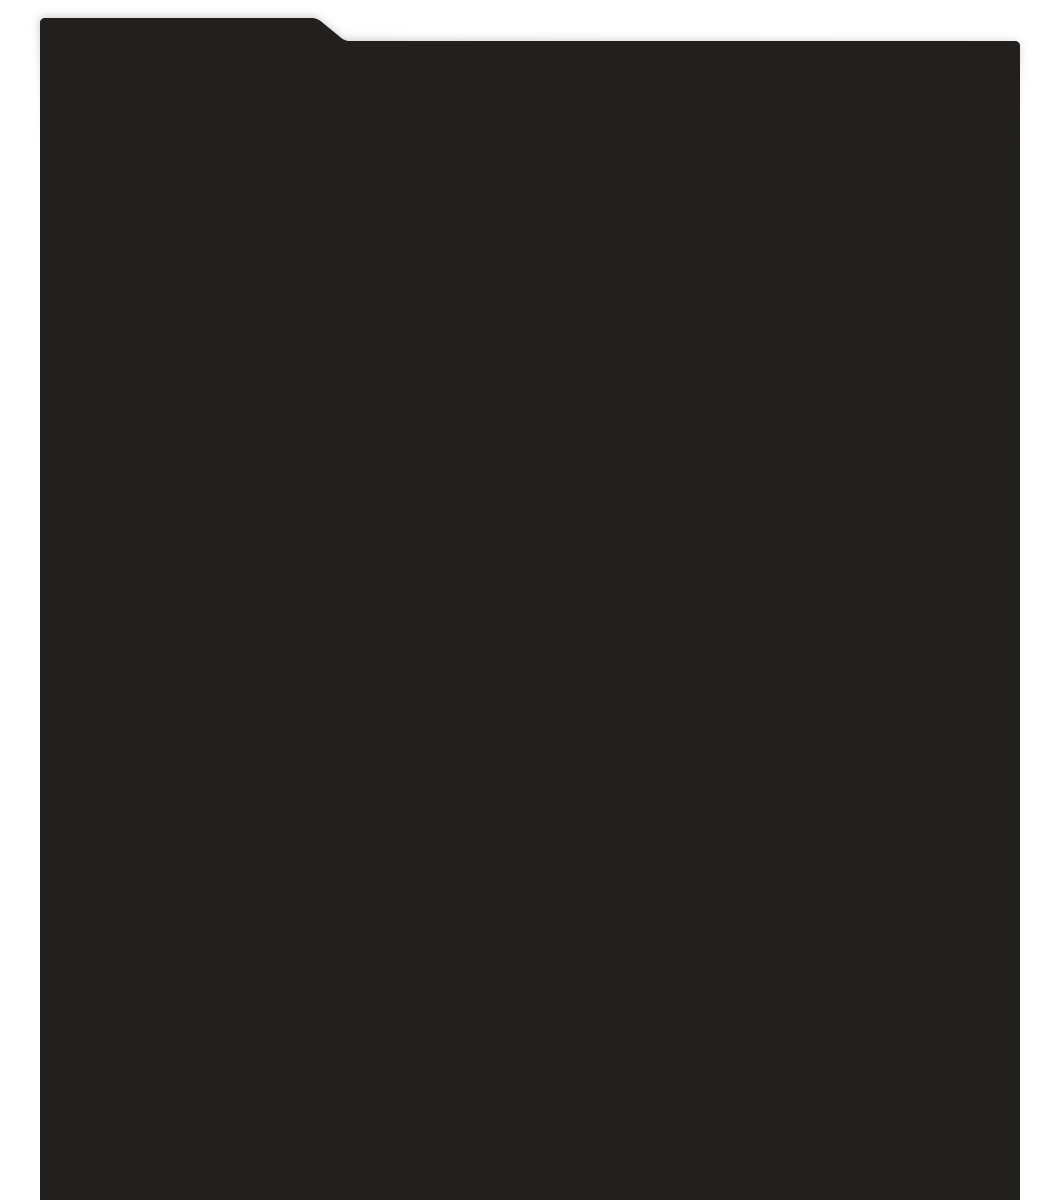
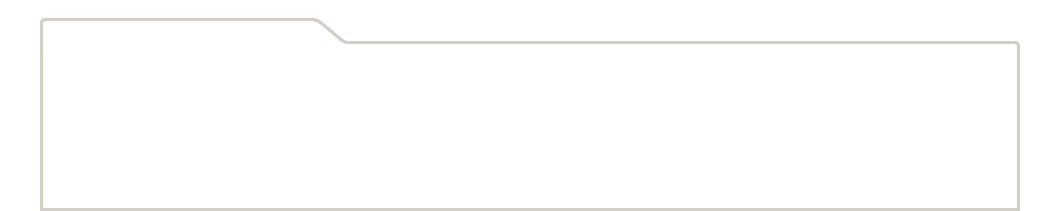
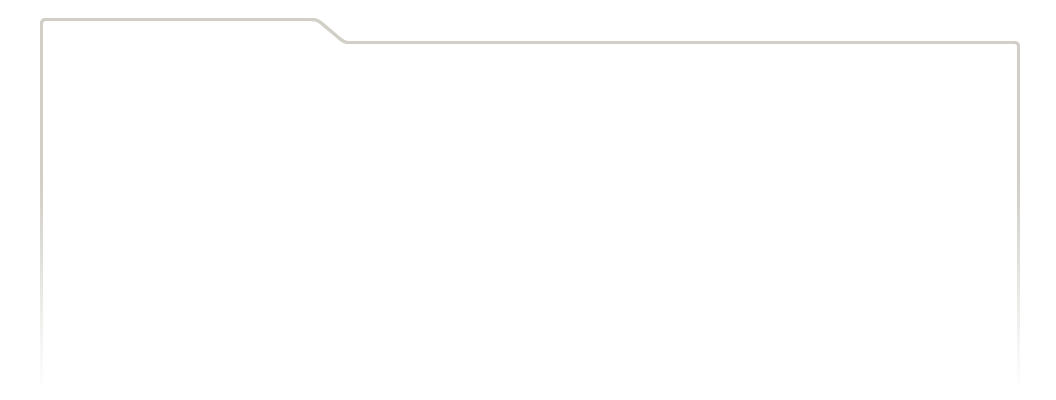
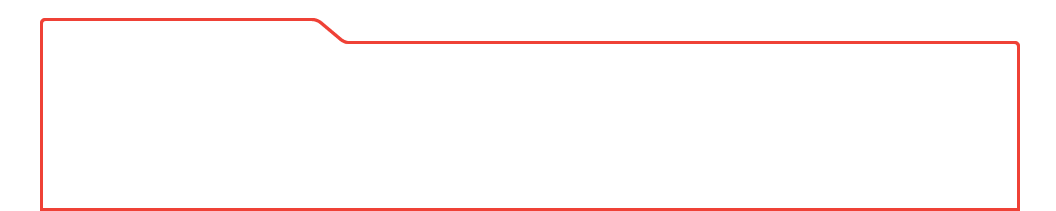
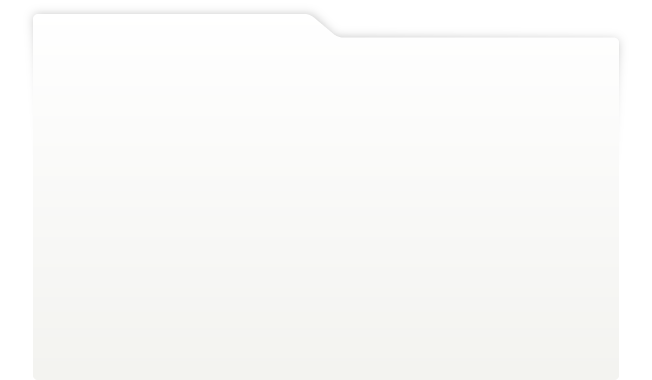
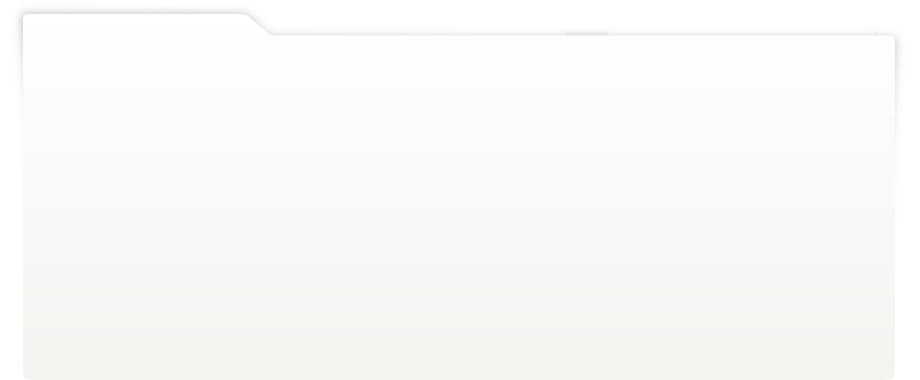
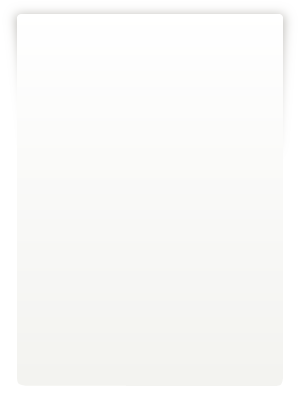
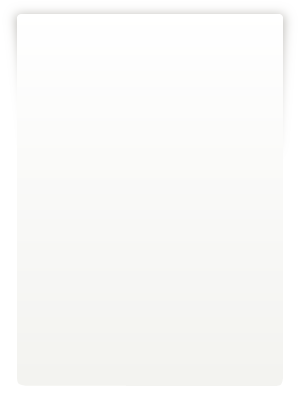
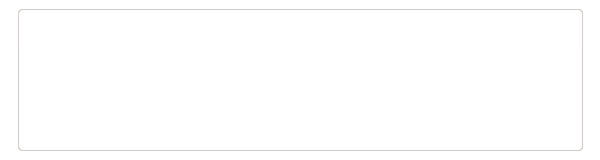
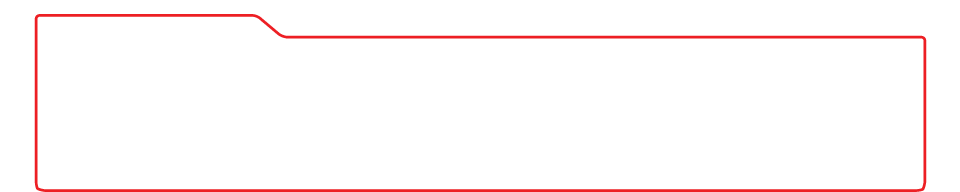
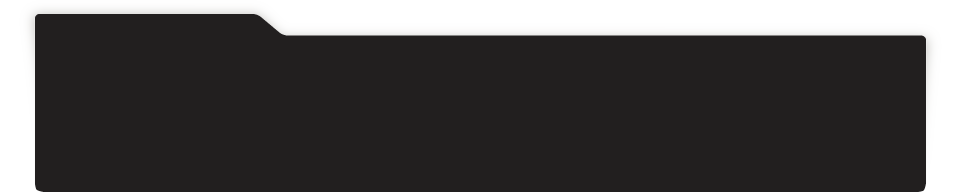
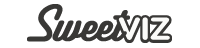
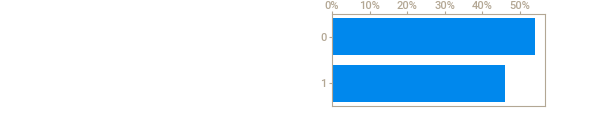
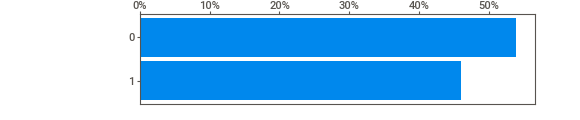
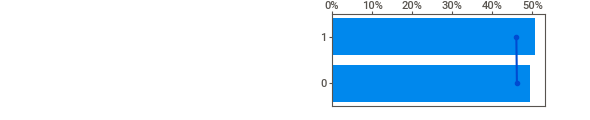
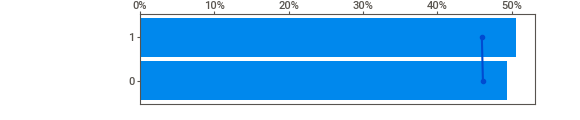
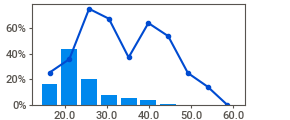
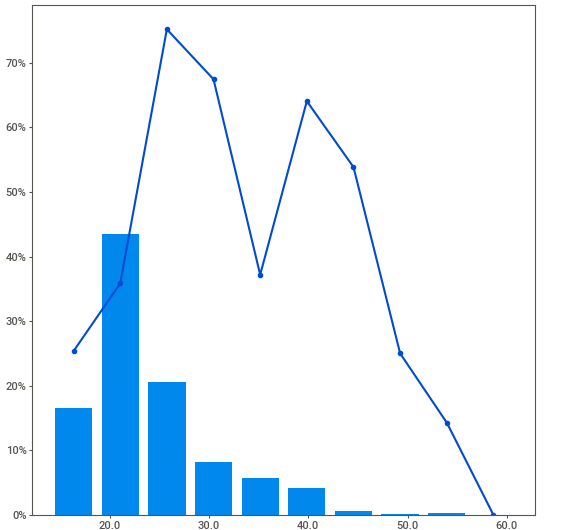
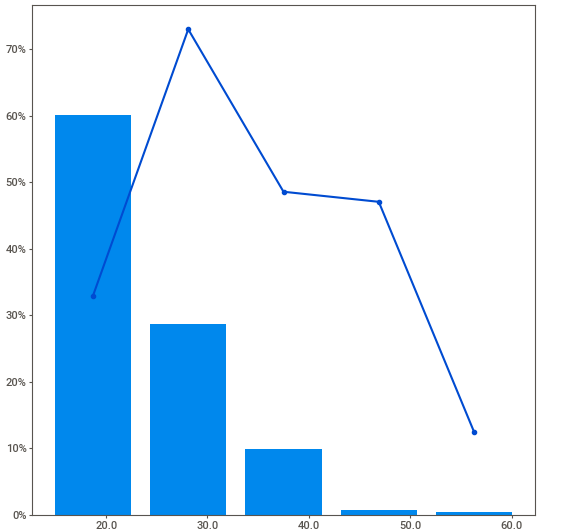
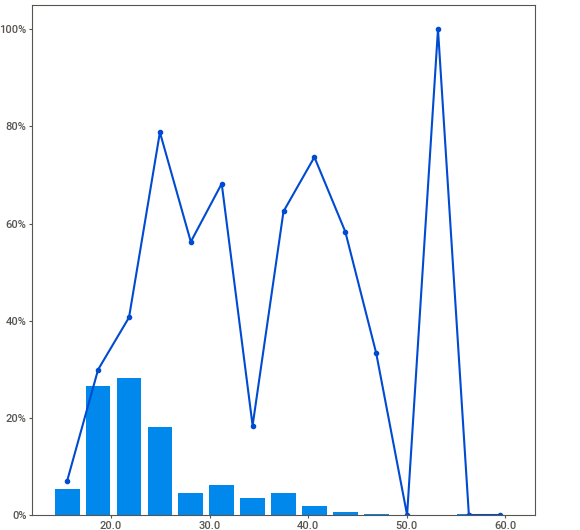
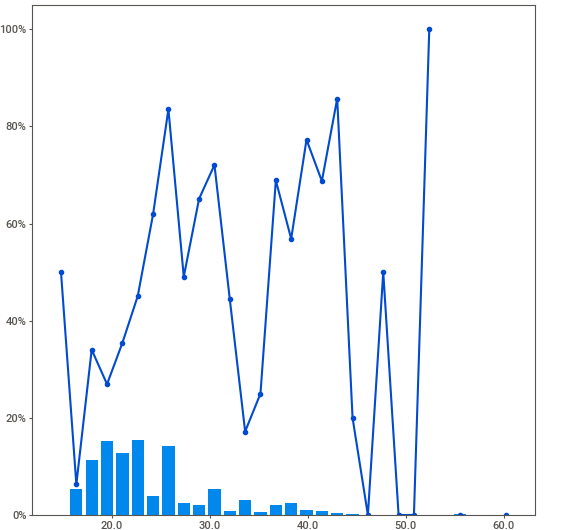
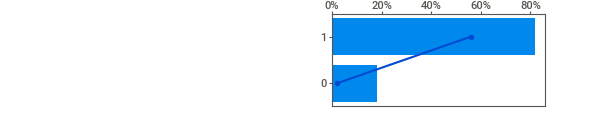
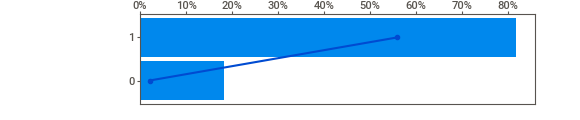
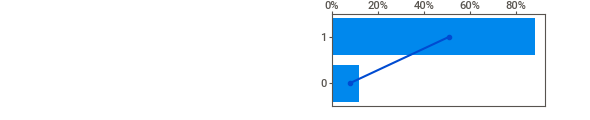
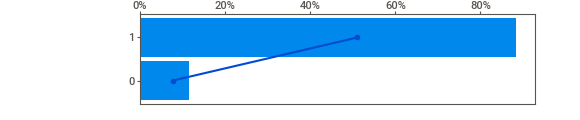
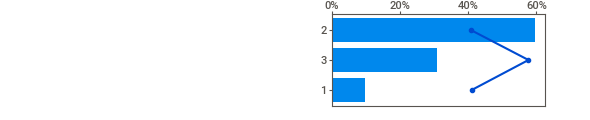
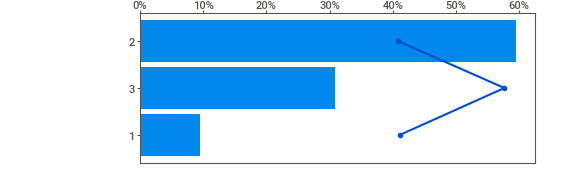
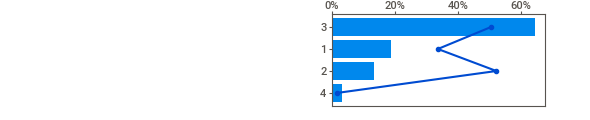
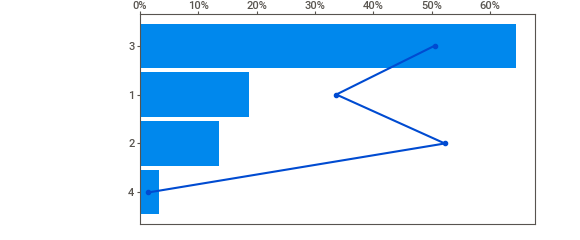
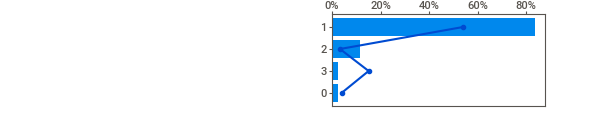
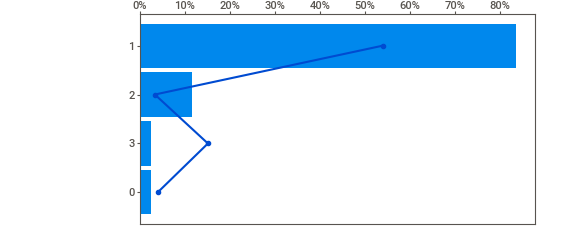
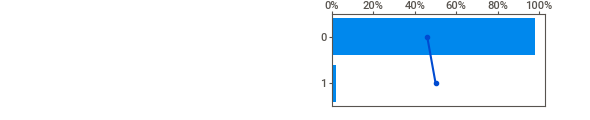
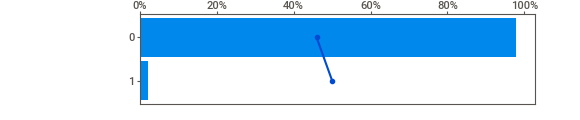
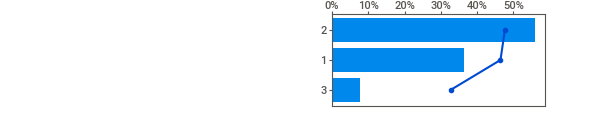
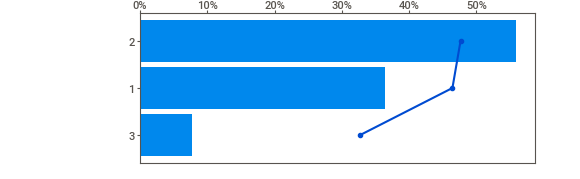
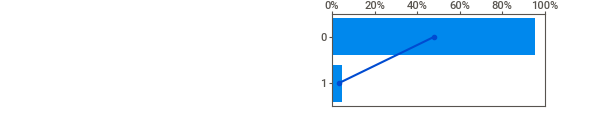
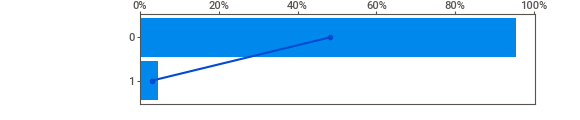
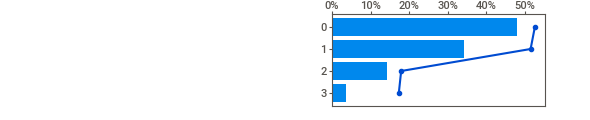
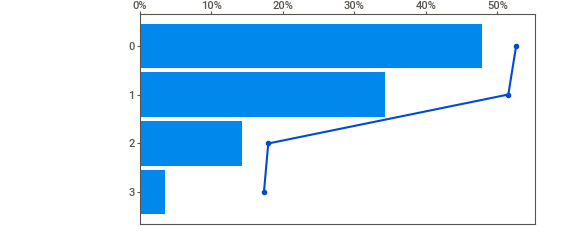
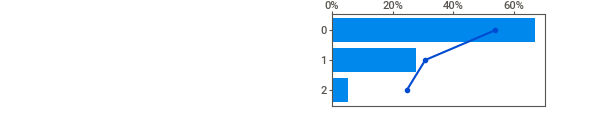
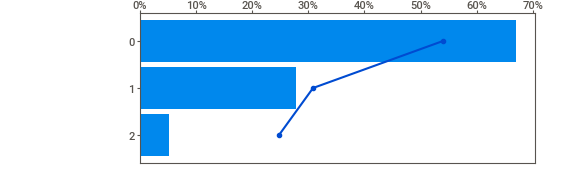
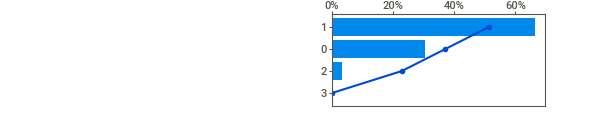
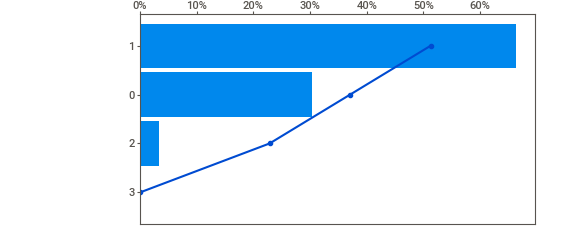
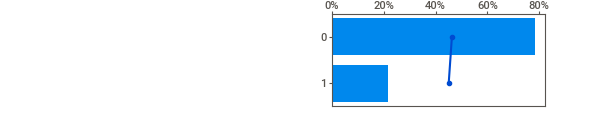
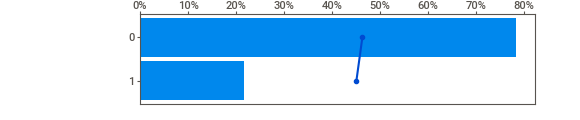
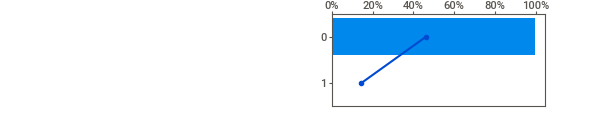
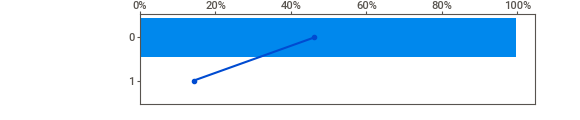
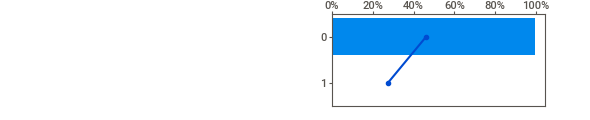
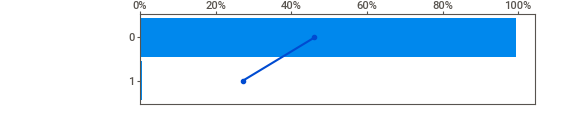
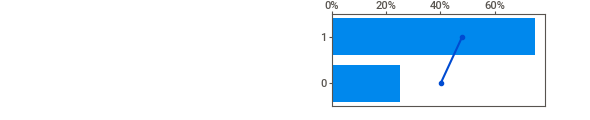
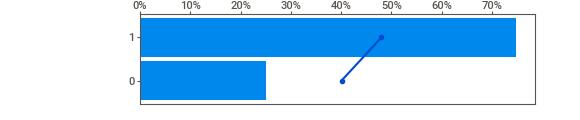
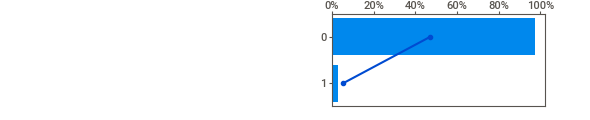
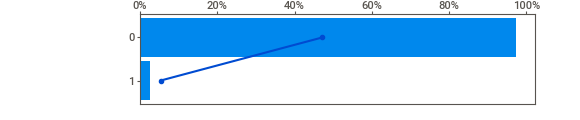
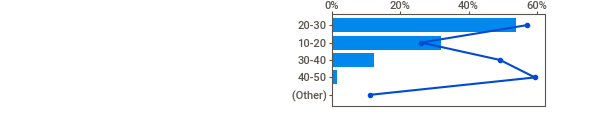
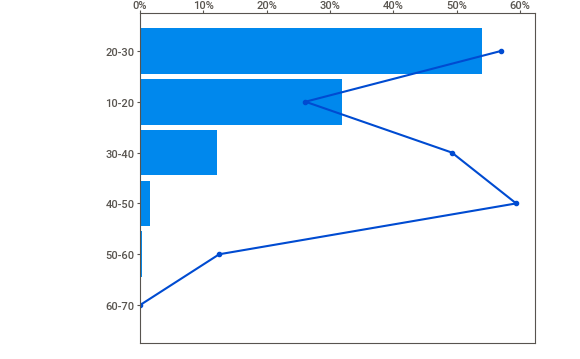
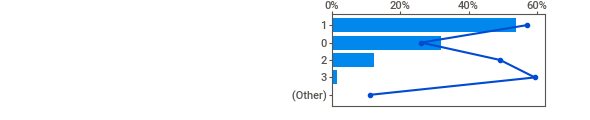
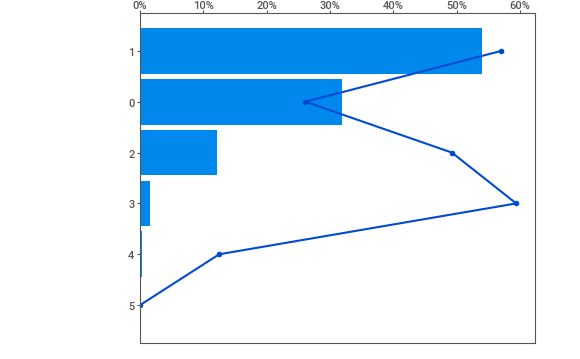
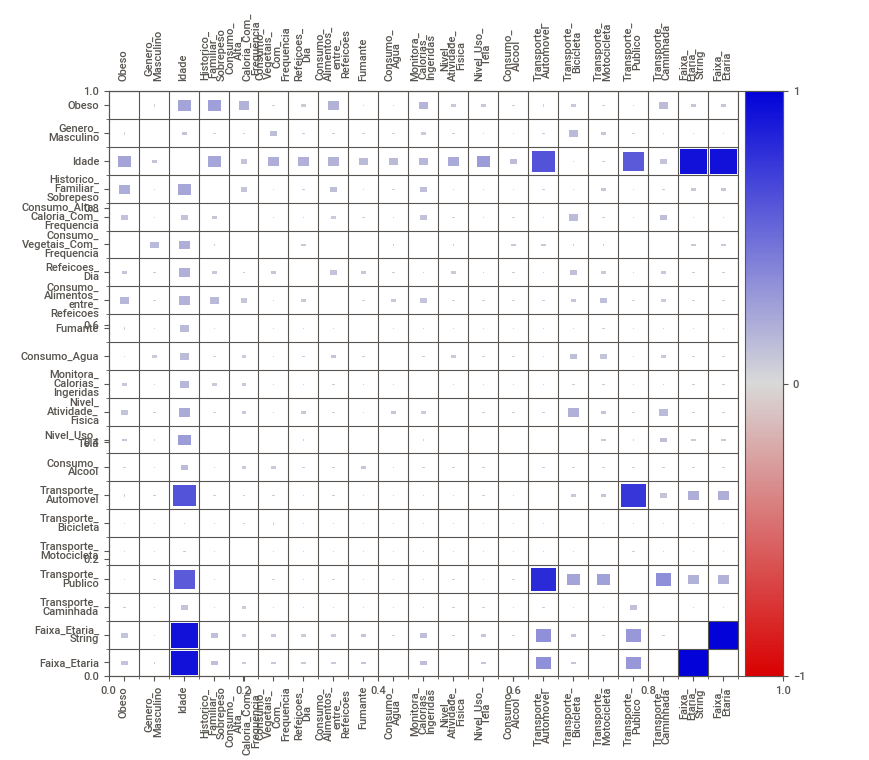
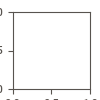

In [22]:
sv_obesidade_report.show_notebook()

## Treinamento do modelo - Baseline

In [23]:
# Dividir Dados de Treino e Teste
X = df_obesidade.drop(columns=['Obeso','Idade','Faixa_Etaria_String'], axis=1)
y = df_obesidade['Obeso']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=51,shuffle=True)

In [24]:
# Treinamento do Modelo
model_baseline = GaussianNB()
model_baseline.fit(X_train,y_train)


,priors,None
,var_smoothing,1e-09


## Métricas Modelo Baseline

In [25]:
# Predizer valores do conjunto de testes
y_pred = model_baseline.predict(X_test)

# Avaliando o desempenho do modelo
classification_report_str = classification_report(y_test,y_pred)
recall_baseline = recall_score(y_test,y_pred,average='macro')

print(f'Relatório de classificação:\n{classification_report_str}')
print(f'Recall:\n{recall_baseline}')


Relatório de classificação:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall:
0.775901204939753


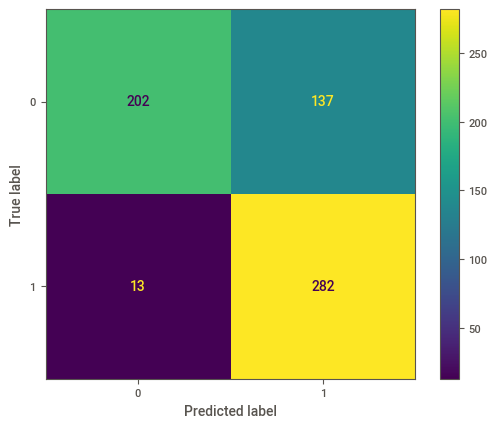

In [26]:
confusion_matrix_dps = confusion_matrix(y_test, y_pred)
display_model = ConfusionMatrixDisplay(confusion_matrix_dps)
display_model.plot()


## Treinamento Modelo - Automated Feature Selection

In [44]:
# Select Kbest - Selecionar as k Melhores features, baseado em um teste

kbest = SelectKBest(score_func=chi2,k=8)

In [45]:
kbest

,score_func,<function chi...x792b4e485f80>
,k,8


In [46]:
X_train_kbest = kbest.fit_transform(X_train,y_train)

In [47]:
X_train_kbest

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 2],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 2],
       [1, 1, 3, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 1]])

In [48]:
# Features selecionadas
kbest_features = kbest.get_support(indices=True)
X_train_best_features = X_train.iloc[:,kbest_features]
X_train_best_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 301 to 2105
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Historico_Familiar_Sobrepeso         1477 non-null   int64   
 1   Consumo_Alta_Caloria_Com_Frequencia  1477 non-null   int64   
 2   Consumo_Alimentos_entre_Refeicoes    1477 non-null   int64   
 3   Monitora_Calorias_Ingeridas          1477 non-null   int64   
 4   Nivel_Atividade_Fisica               1477 non-null   int64   
 5   Nivel_Uso_Tela                       1477 non-null   int64   
 6   Transporte_Caminhada                 1477 non-null   int64   
 7   Faixa_Etaria                         1477 non-null   category
dtypes: category(1), int64(7)
memory usage: 94.0 KB


In [49]:
kbest_features

array([ 1,  2,  5,  8,  9, 10, 16, 17])

In [50]:
# Treinar Modelo com melhores features
modelo_kbest = GaussianNB()
modelo_kbest.fit(X_train_best_features,y_train)


,priors,None
,var_smoothing,1e-09


## Métricas Modelo Select KBest

In [51]:
# Filtrar as features nos dados de teste

X_test_kbest = kbest.transform(X_test)
X_test_best_features = X_test.iloc[:,kbest_features]

In [52]:
# Predizer valores do conjunto de testes
y_pred_kbest = modelo_kbest.predict(X_test_best_features)

# Avaliando o desempenho do modelo
classification_report_str = classification_report(y_test,y_pred_kbest)
recall_baseline = recall_score(y_test,y_pred_kbest,average='macro')

print(f'Relatório de classificação (KBest):\n{classification_report_str}')
print(f'Recall (KBest):\n{recall_baseline}')


Relatório de classificação (KBest):
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       339
           1       0.68      0.95      0.79       295

    accuracy                           0.77       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.77      0.76       634

Recall (KBest):
0.780105994700265


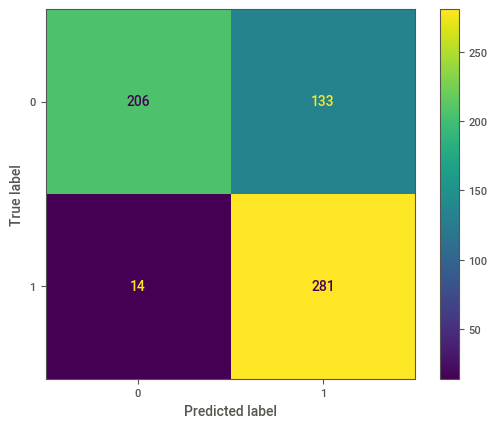

In [53]:
confusion_matrix_kbest = confusion_matrix(y_test, y_pred_kbest)
display_model_kbest = ConfusionMatrixDisplay(confusion_matrix_kbest)
display_model_kbest.plot()


## Tuning de Hiperparâmetros

In [37]:
# Ajustar hiperparâmetros do SelectKbest
# k = K melhores features conforme chi2

def naivebayes_optuna(trial):
    k = trial.suggest_int('k',1,18)
    kbest = SelectKBest(score_func=chi2,k=k)

    X_train_kbest = kbest.fit_transform(X_train,y_train)
    kbest_features = kbest.get_support(indices=True)
    X_train_best_features = X_train.iloc[:,kbest_features]
    modelo_kbest_optuna = GaussianNB()
    modelo_kbest_optuna.fit(X_train_best_features,y_train)
    X_test_kbest = kbest.transform(X_test)
    X_test_best_features = X_test.iloc[:,kbest_features]
    y_pred_kbest = modelo_kbest_optuna.predict(X_test_best_features)
    recall_optuna = recall_score(y_test,y_pred_kbest,average='macro')

    return k,recall_optuna


In [38]:
# Rodar o estudo dos hiperparamentros

search_space = {'k': range(1,19)}
estudo_nb = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space=search_space), directions=['minimize','maximize'])
estudo_nb.optimize(naivebayes_optuna,n_trials=19)

[I 2025-10-14 16:46:56,541] A new study created in memory with name: no-name-414ce64b-e299-418c-aa66-b7a4e0942743
[I 2025-10-14 16:46:56,550] Trial 0 finished with values: [2.0, 0.6659517024148793] and parameters: {'k': 2}.
[I 2025-10-14 16:46:56,556] Trial 1 finished with values: [7.0, 0.748537573121344] and parameters: {'k': 7}.
[I 2025-10-14 16:46:56,562] Trial 2 finished with values: [9.0, 0.775681215939203] and parameters: {'k': 9}.
[I 2025-10-14 16:46:56,568] Trial 3 finished with values: [11.0, 0.7727313634318285] and parameters: {'k': 11}.
[I 2025-10-14 16:46:56,575] Trial 4 finished with values: [15.0, 0.7742062896855157] and parameters: {'k': 15}.
[I 2025-10-14 16:46:56,581] Trial 5 finished with values: [5.0, 0.6950002499875007] and parameters: {'k': 5}.
[I 2025-10-14 16:46:56,587] Trial 6 finished with values: [3.0, 0.6138143092845358] and parameters: {'k': 3}.
[I 2025-10-14 16:46:56,593] Trial 7 finished with values: [17.0, 0.775901204939753] and parameters: {'k': 17}.
[I 

In [42]:
# Mostrar o melhor resultado
trial_best_recall = max(estudo_nb.best_trials, key=lambda t: t.values[1])
print("Trial com maior recall e menor k: ")
print(f"\tTrial Number: {trial_best_recall.number}")
print(f"\tparam (k): {trial_best_recall.params}")
print(f"\tvalues (k, recall): {trial_best_recall.values}")

Trial com maior recall e menor k: 
	Trial Number: 10
	param (k): {'k': 8}
	values (k, recall): [8.0, 0.780105994700265]


In [43]:
# Mostrar Chart com Trials
fig = optuna.visualization.plot_pareto_front(estudo_nb)
fig.show()

## Salvar Modelo

In [54]:
import joblib

joblib.dump(modelo_kbest,'modelo_obesidade.pkl')

['modelo_obesidade.pkl']